# CIFAR-10 Dataset Analysis

This jupyter notebook performs an analysis of the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), constituting a **single-label multiclass image classification problem** across 10 different classes.

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2025-01-15 18:53:15.602037: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-15 18:53:15.614711: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-15 18:53:15.762518: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-15 18:53:15.944444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736967196.057230  353205 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736967196.08

## Load Dataset and Perform Training-Validation-Test Split

In [2]:
# Use the CIFAR-10 dataset from keras for easier retrieval
# (However we are going to use the raw CIFAR-10 dataset and do the splitting ourselves)
(X_train_keras, y_train_keras), (X_test_keras, y_test_keras) = cifar10.load_data()
X = np.concatenate((X_train_keras, X_test_keras), axis=0)
y = np.concatenate((y_train_keras, y_test_keras), axis=0)
X_scaled = X / 255.0
y_cat = to_categorical(y, 10)
X_train, X_remain, y_train, y_remain = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42, stratify=y_cat)
X_val, X_test, y_val, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=42, stratify=y_remain)

## Dataset Classes
The **CIFAR-10 dataset** consists of **60000 32x32 colour images in 10 classes**, with **6000 images per class**. Therefore, in this assignment, our objective is to solve the **image classification problem** using the CIFAR-10 dataset accross the following 10 different classes: **airplane**, **automobile**, **bird**, **cat**, **deer**, **dog**, **frog**, **horse**, **ship** and **truck**. As the goal is to to classify each image into one of the 10 distinct classes, this problem consitutes a **single-label multiclass classification problem**.

Each image belongs to exactly one class, with all the the classes being completely mutually exclusive. For instance, there is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, etc., while "Truck" includes only big trucks (neither includes pickup trucks).

**The 10 different classes, along with 10 different random samples from each class, are represented in the following image.** As previously mentioned, the images in the CIFAR-10 dataset are clearly **colored**, with each pixel values ranging from **0 to 255 for the three color channels: Red, Green, and Blue (RGB)**. To facilitate effective model training, it is **crucial to normalize these pixel values** to a range between 0 and 1, by dividing each pixel value by 255. As demonstrated in the rest of the notebooks and in the report, this normalization step was indeed carried out.

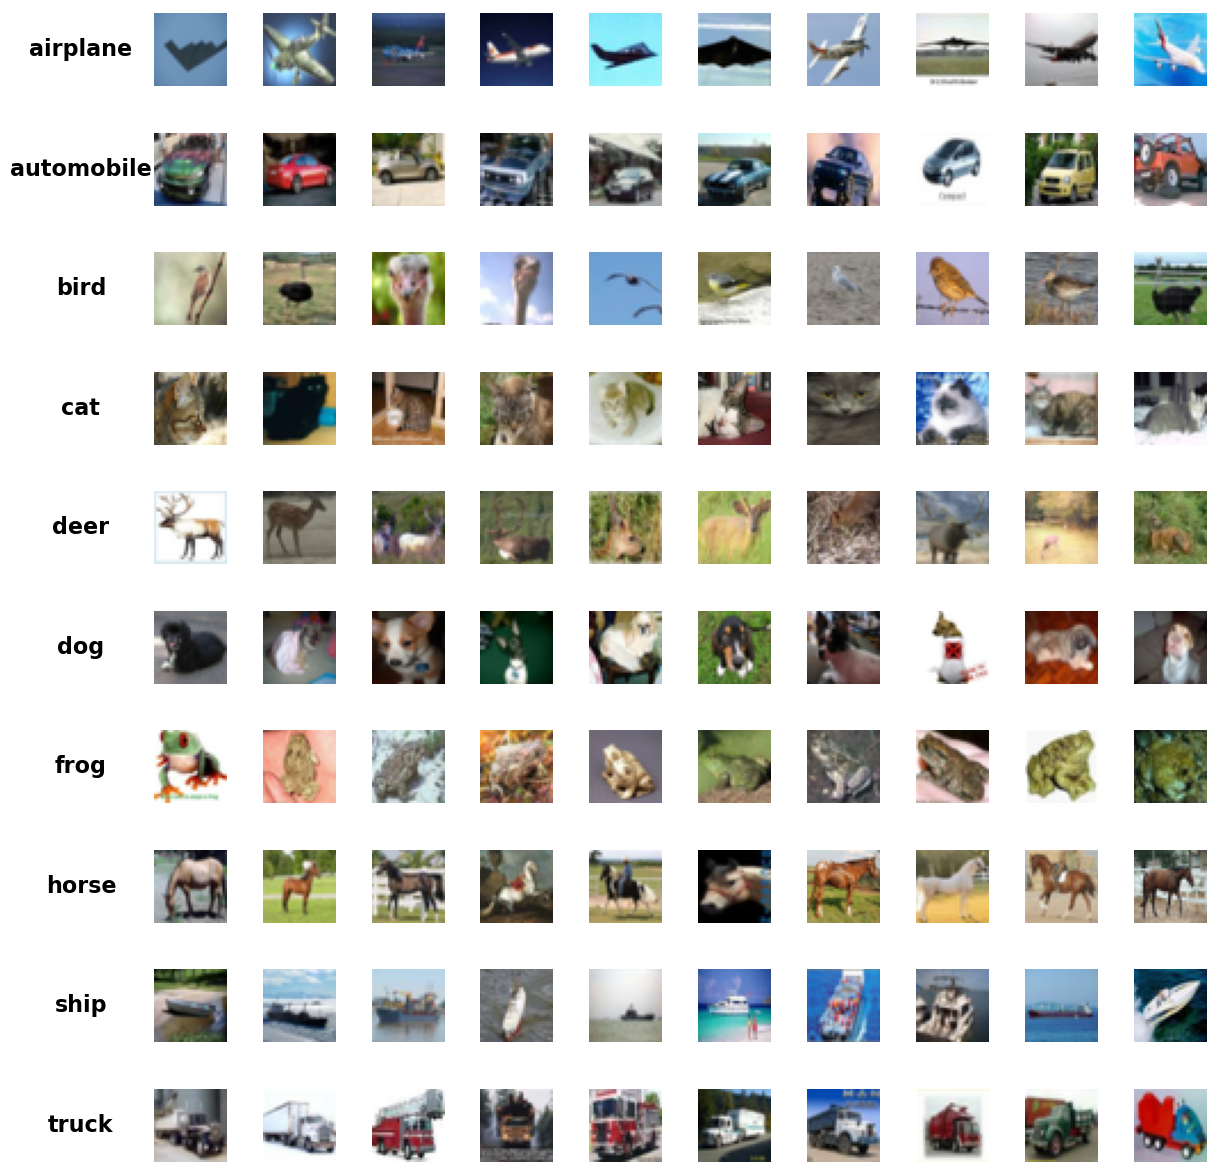

In [3]:
np.random.seed(107660108)
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
n_rows = 10
n_cols = 10
fig, axes = plt.subplots(n_rows, n_cols + 1, figsize=(15, 15))
axes = axes.ravel()

for i in range(n_rows):
    axes[i * (n_cols + 1)].axis('off')
    axes[i * (n_cols + 1)].text(0.5, 0.5, class_labels[i], rotation=0, verticalalignment='center', horizontalalignment='center', fontsize=16, weight='bold')

    for j in range(n_cols):
        index = np.random.randint(0, X_train.shape[0])
        while np.argmax(y_train[index]) != i:
            index = np.random.randint(0, X_train.shape[0])
        axes[i * (n_cols + 1) + j + 1].imshow(X_train[index])
        axes[i * (n_cols + 1) + j + 1].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

## Class Distribution in Training, Validation and Test Sets

As indicated on the CIFAR-10 website, the original dataset is balanced with 6000 images per class. This observation is confirmed by the following histogram that shows an even distribution of 10% (6000 entries) for each class. As a result, **accuracy is a suitable metric for evaluating the performance of the model** for the **multiclass classification problem**.


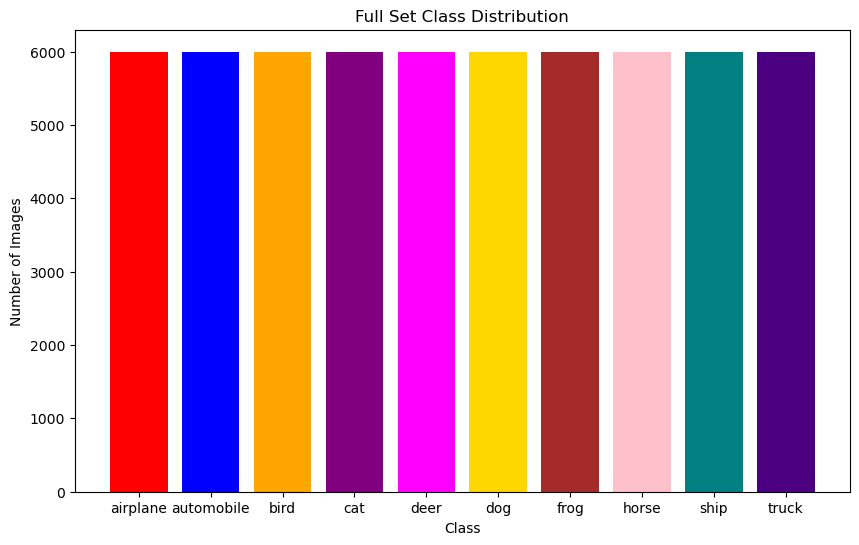

In [4]:
class_colors = ['red', 'blue', 'orange', 'purple', 'magenta', 'gold', 'brown', 'pink', 'teal', 'indigo']

full_class_counts = np.sum(y_cat, axis=0)
plt.figure(figsize=(10, 6))
plt.bar(class_labels, full_class_counts, color=class_colors)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Full Set Class Distribution')
plt.show()

When performing **Train-Validation-Test splits**, it's important to ensure that each subset of the data is representative of the overall dataset. By using **stratified sampling** (parameter *stratify* of *train_test_split* function), we ensure that the class distribution in each subset (train, validation, and test) is the same as the distribution in the original dataset. Therefore, this approach maintains the balance of classes across all training, validation, and test sets. 

We performed an **80-10-10 split** for the train, validation, and test sets, which amounts to **48000 images for training** (80% of 60000), **6000 images for validation** (10% of 60000) and **6000 images for testing** (10% of 60000). By using **stratified sampling**, the training, validation and test resulting sets are also balanced with **10% of entries for each class**, which amounts to 4800 samples (10% of 80% of 60000) for the training set and 600 samples for the validation and test sets (10% of 10% of 60000).

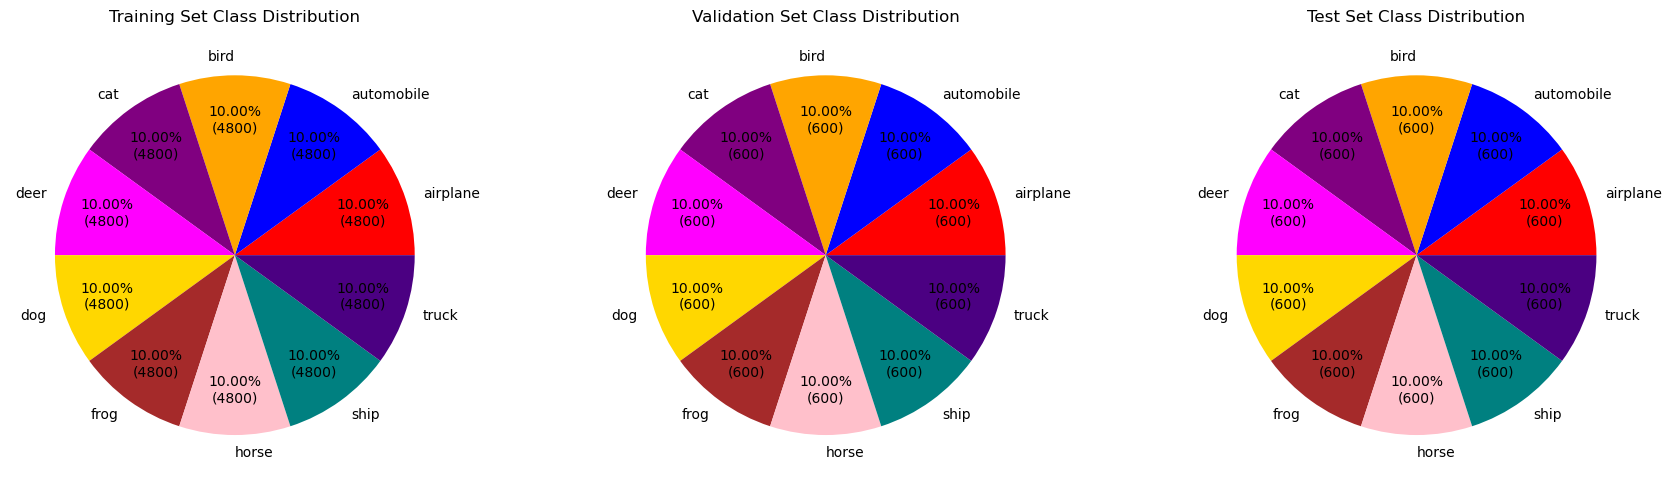

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Training set class distribution
train_class_counts = np.sum(y_train, axis=0)
axes[0].pie(
    train_class_counts,
    autopct=lambda pct: '{:.2f}%\n({})'.format(pct, int(round(pct*sum(train_class_counts)/100.0))), 
    labels=class_labels, colors=class_colors, pctdistance=0.75
)
axes[0].set_title('Training Set Class Distribution')

# Validation set class distribution
val_class_counts = np.sum(y_val, axis=0)
axes[1].pie(
    val_class_counts,
    autopct=lambda pct: '{:.2f}%\n({})'.format(pct, int(round(pct*sum(val_class_counts)/100.0))), 
    labels=class_labels, colors=class_colors, pctdistance=0.75
)
axes[1].set_title('Validation Set Class Distribution')

# Test set class distribution
test_class_counts = np.sum(y_test, axis=0)
axes[2].pie(
    test_class_counts,
    autopct=lambda pct: '{:.2f}%\n({})'.format(pct, int(round(pct*sum(test_class_counts)/100.0))), 
    labels=class_labels, colors=class_colors, pctdistance=0.75
)
axes[2].set_title('Test Set Class Distribution')

plt.tight_layout()
plt.show()
